In [4]:
import pandas as pd 
import  matplotlib.pyplot as plt
from main import leitura_csv

Nulos:
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
 duplicados: 0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
Inconsistencia:
Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []


In [5]:
def evoluçao_close():
    plt.figure(figsize=(12,6))
    plt.plot(df['Date'], df['Close'], label='Preço de Fechamento', color='blue')
    plt.title('Preço de Fechamento da Ação da Google (2015-2024)')
    plt.xlabel('Data')
    plt.ylabel('Preço ($)')
    plt.grid(True)
    plt.legend()
    plt.show()

In [6]:
def media_volume():
    df = leitura_csv()
    df['month'] = df['Date'].dt.month
    df['year'] = df['Date'].dt.year
    media = df.groupby(['year', 'month'])['Volume'].mean()

    plt.figure(figsize=(15, 7)) 
    media.plot(kind='bar', color='skyblue') 
    plt.title('Média Mensal de Volume por Ano')
    plt.xlabel('Ano e Mês')
    plt.ylabel('Volume Médio')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


In [7]:
def variacao_preço_ano():
    df = leitura_csv()
    df['year'] = df['Date'].dt.year
    variacao = df.groupby('year')['Close'].agg(lambda x: x.max() - x.min())
    print(variacao)
    plt.figure(figsize=(12,6))
    variacao.plot(kind='bar', color='tomato', edgecolor='black')
    plt.title('Variação Anual do Preço de Fechamento das Ações da Google')
    plt.xlabel('Ano')
    plt.ylabel('Variação de Preço ($)')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [8]:
def desvio_padrao():
    df = leitura_csv()
    df['year'] = df['Date'].dt.year
    df['month'] = df['Date'].dt.month
    desvio_padrao = df.groupby(['year','month'])['Close'].std().unstack()
    print(desvio_padrao)
    plt.figure(figsize=(15, 6))
    plt.imshow(desvio_padrao, aspect='auto', cmap='hot', interpolation='nearest')
    plt.title('Volatilidade Mensal do Preço de Fechamento (Desvio Padrão)')
    plt.xlabel('Mês')
    plt.ylabel('Ano')
    plt.colorbar(label='Desvio Padrão')
    plt.xticks(ticks=range(12), labels=range(1, 13))
    plt.yticks(ticks=range(len(desvio_padrao.index)), labels=desvio_padrao.index)
    plt.show()

In [9]:
def analise_de_tendencias():
    df = leitura_csv()
    df['media_movel'] = df['Close'].rolling(window=30).mean()
    print(df['media_movel'])
    plt.figure(figsize=(15, 6))
    plt.plot(df['Date'], df['Close'], label='Preço de Fechamento', alpha=0.5)
    plt.plot(df['Date'], df['media_movel'], label='Média Móvel (30 dias)', color='red')
    plt.title('Tendência do Preço de Fechamento com Média Móvel (30 dias)')
    plt.xlabel('Data')
    plt.ylabel('Preço ($)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [10]:
def detecta_anomalias(ano_escolhido=2020):
    df = leitura_csv()
    df['year'] = df['Date'].dt.year
    df = df[df['year'] == ano_escolhido]
    df['month'] = df['Date'].dt.month
    df['day'] = df['Date'].dt.day
    medias = df.groupby(['month', 'day'])['Close'].mean()
    desvios = df.groupby(['month', 'day'])['Close'].std()

    df['media_dia'] = df.apply(lambda row: medias.loc[(row['month'], row['day'])], axis=1)
    df['std_dia'] = df.apply(lambda row: desvios.loc[(row['month'], row['day'])], axis=1)

    df['anomalia'] = (df['Close'] > df['media_dia'] + 2 * df['std_dia']) | \
                     (df['Close'] < df['media_dia'] - 2 * df['std_dia'])

    import matplotlib.pyplot as plt
    plt.figure(figsize=(15, 6))
    plt.plot(df['Date'], df['Close'], label='Fechamento')
    plt.scatter(df[df['anomalia']]['Date'], df[df['anomalia']]['Close'],
                color='red', label='Anomalias', zorder=5)
    plt.title(f'Anomalias no Preço de Fechamento em {ano_escolhido}')
    plt.xlabel('Data')
    plt.ylabel('Preço de Fechamento ($)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [22]:
def prev_tendencias():
    df = leitura_csv()
    df['media_curta'] = df['Close'].rolling(window = 20).mean()
    df['media_longa'] = df['Close'].rolling(window = 50).mean()
    df['compra'] = (df['media_curta'] > df['media_longa']) & (df['media_curta'].shift(1) <= df['media_longa'].shift(1))
    df['venda'] = (df['media_curta'] < df['media_longa']) & (df['media_curta'].shift(1) >= df['media_longa'].shift(1))
    
    plt.figure(figsize=(15,6))
    plt.plot(df['Date'], df['Close'], label='Preço Fechamento', color='gray', alpha=0.4)
    plt.plot(df['Date'], df['media_curta'], label='Média Curta (20)', color='blue')
    plt.plot(df['Date'], df['media_longa'], label='Média Longa (50)', color='orange')

    # Sinais
    plt.scatter(df.loc[df['compra'], 'Date'], df.loc[df['compra'], 'Close'], label='Compra', marker='^', color='green', s=100)
    plt.scatter(df.loc[df['venda'], 'Date'], df.loc[df['venda'], 'Close'], label='Venda', marker='v', color='red', s=100)

    plt.title('Análise de Tendência com Médias Móveis')
    plt.xlabel('Data')
    plt.ylabel('Preço ($)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

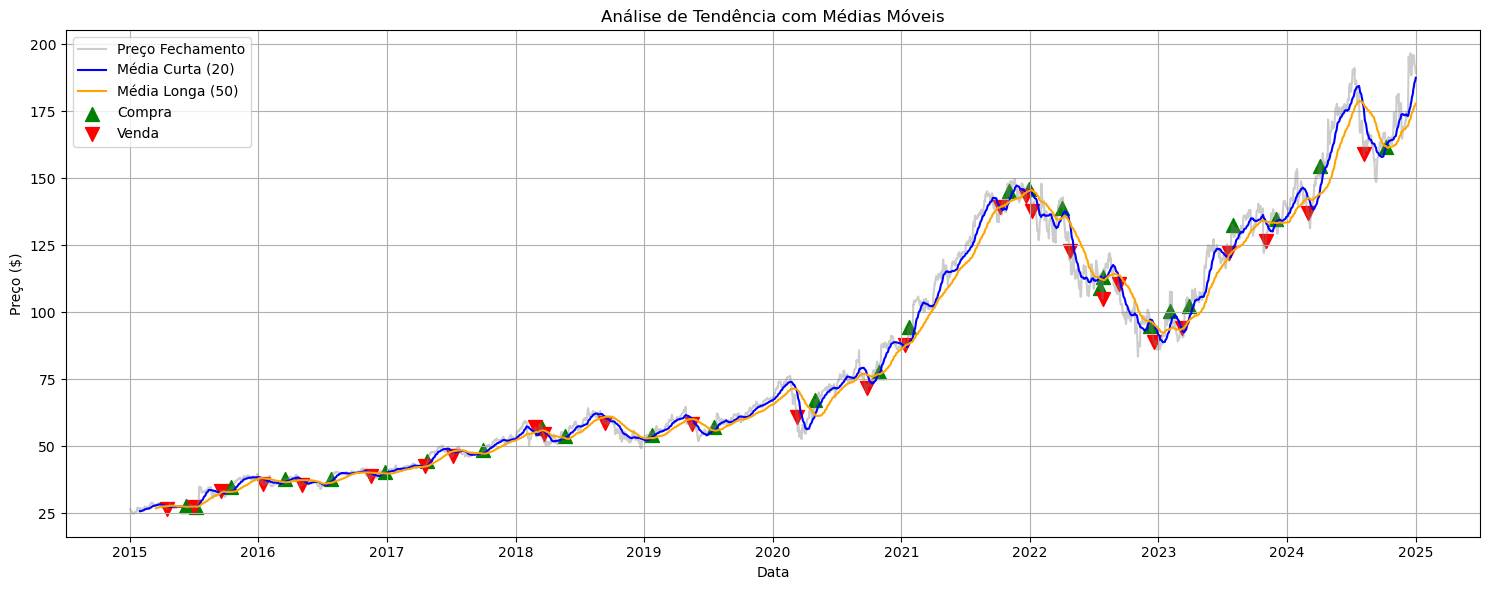

In [23]:
prev_tendencias()